LG

Analyse des data puis PCA :


,metacritic_score,achievements,recommendations,positive,negative,median_playtime_forever,peak_ccu,num_reviews_total
metacritic_score,1.000000,0.021025,0.121143,0.107209,0.070160,0.004064,0.031947,0.088709
achievements,0.021025,1.000000,0.013422,0.012034,0.008795,0.001649,0.003560,0.010169
recommendations,0.121143,0.013422,1.000000,0.932938,0.775617,0.005336,0.696623,0.901180
positive,0.107209,0.012034,0.932938,1.000000,0.819434,0.004559,0.792038,0.982726
negative,0.070160,0.008795,0.775617,0.819434,1.000000,0.003581,0.824555,0.874095
median_playtime_forever,0.004064,0.001649,0.005336,0.004559,0.003581,1.000000,0.002972,0.004153
peak_ccu,0.031947,0.003560,0.696623,0.792038,0.824555,0.002972,1.000000,0.831114
num_reviews_total,0.088709,0.010169,0.901180,0.982726,0.874095,0.004153,0.831114,1.000000


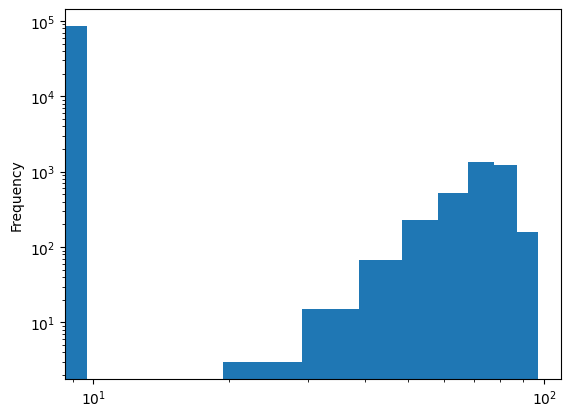

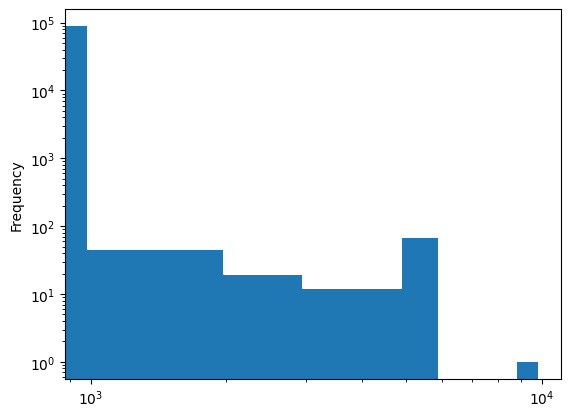

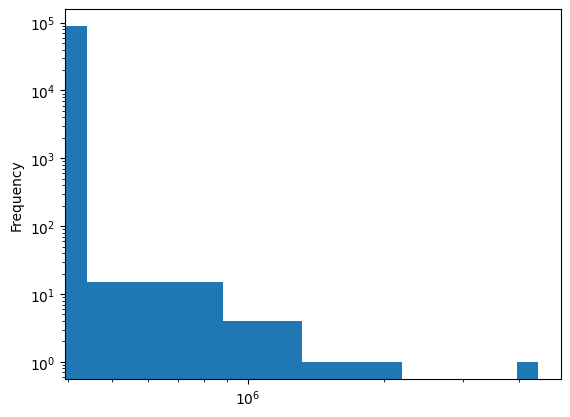

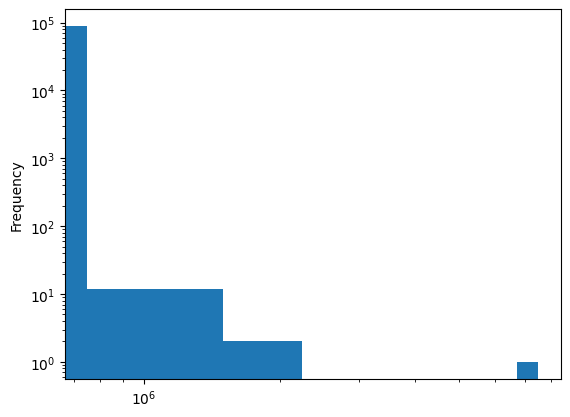

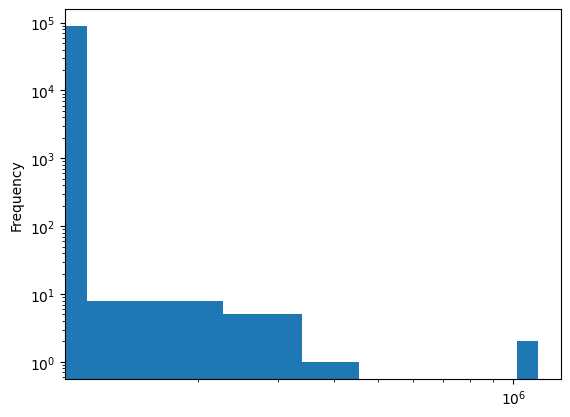

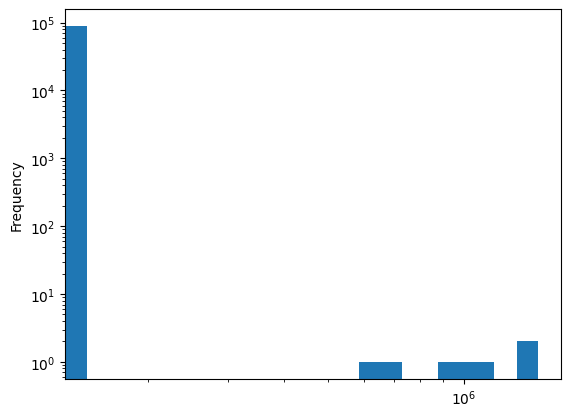

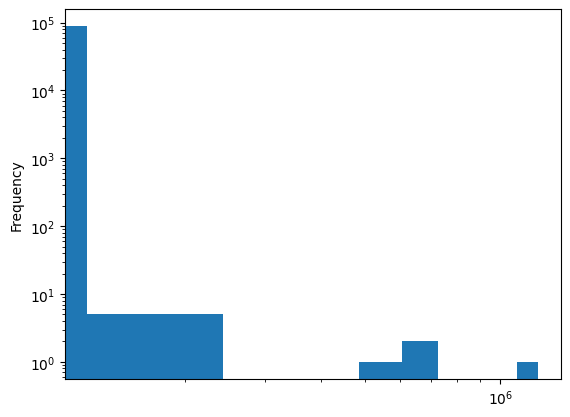

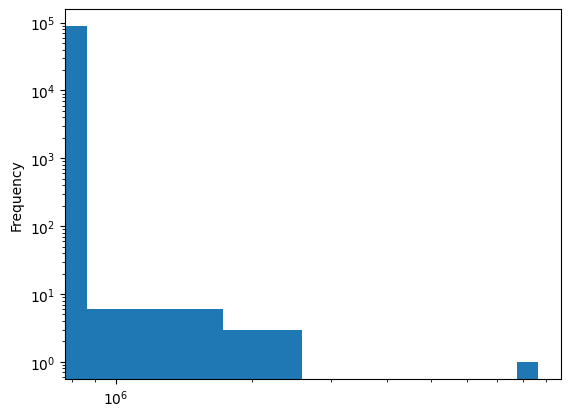

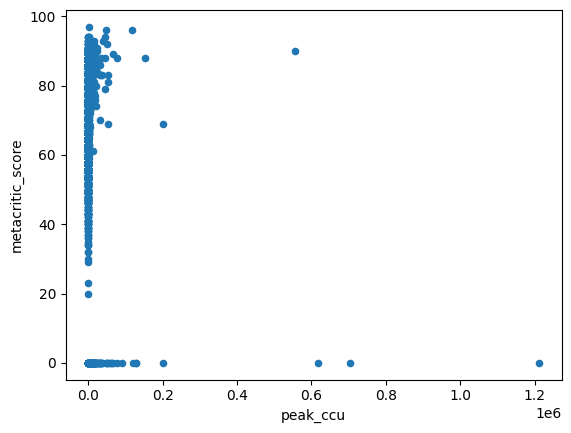

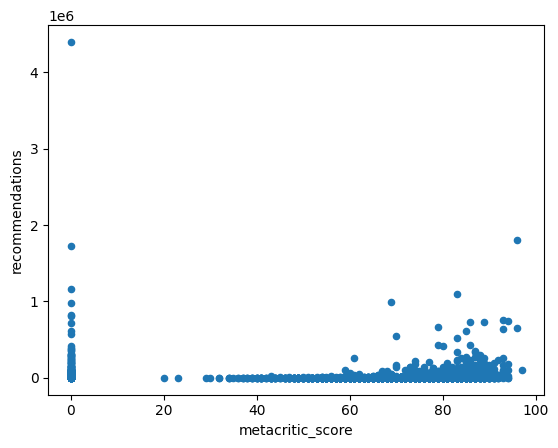

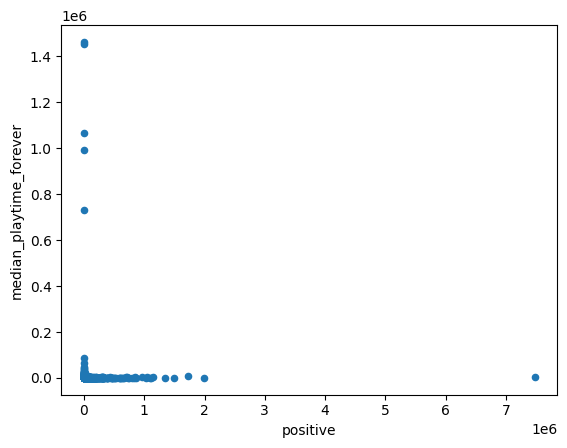

In [ ]:
%matplotlib inline
#importation de la librairie
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./dataset/Steam_Games_2025.csv")


#we look at the distributions in general of our data :
# print(df.describe(include='all'))

#for the columns with numbers, we can plot the histograms
#df.hist(column='appid')
list=['metacritic_score','achievements','recommendations','positive','negative','median_playtime_forever','peak_ccu','num_reviews_total']

#histogrammes
for x in list:
  plt.figure()
  df[x].plot.hist(loglog=True)
#même en affichant les données sous l'échelle logarithmique, on observe déjà des pics au niveau de 0 pour les données manquantes(le dataset n'est pas complet)

#covariance & correlation
df2=df[['metacritic_score','achievements','recommendations','positive','negative','median_playtime_forever','peak_ccu','num_reviews_total']]
df2.corr() 
#on observe qu'il y a qlq redondances dans notre jeux de données, les catégories recommendations, positive et num_reviews_total ont une correlation au dessus de 0.9.

df.plot.scatter(x='peak_ccu',y='metacritic_score')
df.plot.scatter(x='metacritic_score',y='recommendations')
df.plot.scatter(x='positive',y='median_playtime_forever')
#en testant qlq combinaisons de catégories en x et y (en évitant de prendre des catégories trop redondantes), 
# on observe que les données ne se regroupe pas bien, se répartissant plus selon l'absence de données que formant des clusters cohérents



In [ ]:
#we search for how much features are missing

missing = df.eq(0).sum()
lenght= len(df)
print(missing)
print("lenght total du data set =",lenght)

#on observe que beaucoup de données sont manquante sur ce dataset, en particulier sur les petits jeux qui représentent la majorité des sorties steam.

appid                          0
name                           0
release_date                   0
required_age               88589
price                      14160
dlc_count                  75388
metacritic_score           86071
achievements               41090
recommendations            72881
categories                     0
positive                   19425
negative                   30396
median_playtime_forever    81608
peak_ccu                   70698
pct_pos_total                 18
num_reviews_total              0
dtype: int64
lenght total du data set = 89618


Principal Component Analysis (PCA)

source : https://medium.com/@jackiee.jecksom/clustering-and-principal-component-analysis-pca-from-sklearn-c8ea5fed6648


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from sklearn.preprocessing import Normalizer
normal_values = Normalizer().fit_transform(df.values)
print(normal_values)
pca = PCA()
pca.fit(normal_values)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()